# ATP Tennis Data - Player Diff Stats


In our feature engineering notebooks, we created a dataset for match where we left categorical columns un-encoded. We will run this dataset through various classification models and see how the models perform. 

We are going to establish a baseline for various models in this notebook. If I didn't know anything about tennis and the players, I would most likely only use the player rank to determin winner. This will be our baseline for the models.

From our EDA, our baseline should be around 65%

# Summary of Results

Most of our models, got around 65%. KNN seems to be doing the worst as it only got 59% accuracy

```
Model Score: 0.6519918973666442

ROC/AUC Score: 0.651991743720225
              precision    recall  f1-score   support

        Loss       0.65      0.65      0.65     14815
         Win       0.65      0.65      0.65     14805

    accuracy                           0.65     29620
   macro avg       0.65      0.65      0.65     29620
weighted avg       0.65      0.65      0.65     29620
```



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper, RSTATE, N_JOBS, MAX_ITER, LABEL_COL
import util.model_util as mu
import logging
import importlib

logging.basicConfig(level=logging.INFO)
%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d %H:%m'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "baseline"


# sometimes I run these notebooks via command line. Environment variable is set so we know whether we are in DEBUG mode or not
# if you want to manually run this in DEBUG mode, change default value to True
DEBUG = bool(os.environ.get("IPYNB_DEBUG", False))

if DEBUG:
    DESCRIPTION = f"{DESCRIPTION}-test"
    FEATURE_FILE = '../datasets/atp_matches_1985-2019_features_test-raw_diff-ohe-history-matchup-stats.csv'
    ModelWrapper.REPORT_FILE = '../reports/summary-test.csv'
else:
    FEATURE_FILE = '../datasets/atp_matches_1985-2019_features-raw_diff-ohe-history-matchup-stats.csv'




START_YEAR = 1998
END_YEAR = 2018


column_filters = ["util.model_util.BaselineFilter"]

# Get our baseline

If we really don't know anything about tennis, then a reasonable way of predicting wins/losses would be by player rank. If we look at our dataset, the accuracy of using this method for prediction would be the baseline accuracy for our model:

rank_diff == p1_rank - p2_rank

If player 1 rank < player 2 rank, then label == 1 (win)
If player 2 rank < player 1 rank, then label == 0 (loss)


In [2]:
X_train, X_test, y_train, y_test = ModelWrapper.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR, 
                                                         column_filters = column_filters)
print(f'Final columns: {X_test.columns}')

INFO:util.model_util:loading ../datasets/atp_matches_1985-2019_features-raw_diff-ohe-history-matchup-stats.csv
INFO:util.model_util:Shape before filtering: (118478, 5464)
INFO:util.model_util:Adding filter: util.model_util.BaselineFilter
INFO:util.model_util:Shape after filtering: (118478, 1)
INFO:util.model_util:Final Features shape: (118478, 1)


Final columns: Index(['rank_diff'], dtype='object')


# Run all Models

In [3]:
models = [
    LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
    KNeighborsClassifier(n_jobs = N_JOBS),
    DecisionTreeClassifier(random_state = RSTATE),
    RandomForestClassifier(random_state=RSTATE, verbose=1),
    GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
    AdaBoostClassifier(random_state=RSTATE),
]



Running LogisticRegression
[LibLinear]Model Score: 0.6520256583389602

ROC/AUC Score: 0.6520254705022873
              precision    recall  f1-score   support

        Loss       0.65      0.65      0.65     14815
         Win       0.65      0.65      0.65     14805

    accuracy                           0.65     29620
   macro avg       0.65      0.65      0.65     29620
weighted avg       0.65      0.65      0.65     29620

      Loss   Win
Loss  9668  5147
Win   5160  9645


/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


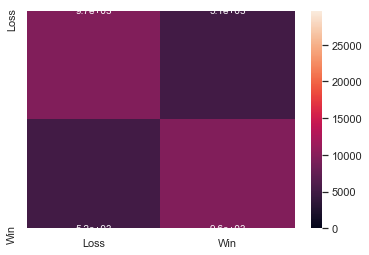

INFO:util.model_util:Saving model file: ../models/logisticregression-1998-2018-baseline.pkl


Saving report: ../reports/summary.csv


Running KNeighborsClassifier
Model Score: 0.5934166103983795

ROC/AUC Score: 0.5934187638763938
              precision    recall  f1-score   support

        Loss       0.59      0.59      0.59     14815
         Win       0.59      0.60      0.60     14805

    accuracy                           0.59     29620
   macro avg       0.59      0.59      0.59     29620
weighted avg       0.59      0.59      0.59     29620

      Loss   Win
Loss  8697  6118
Win   5925  8880


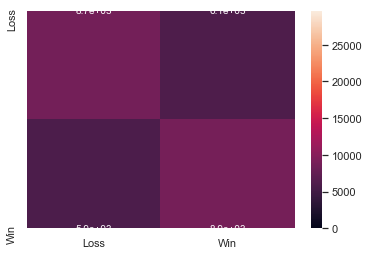

INFO:util.model_util:Saving model file: ../models/kneighborsclassifier-1998-2018-baseline.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


Running DecisionTreeClassifier
Model Score: 0.6488521269412559

ROC/AUC Score: 0.6488511864726312
              precision    recall  f1-score   support

        Loss       0.65      0.65      0.65     14815
         Win       0.65      0.65      0.65     14805

    accuracy                           0.65     29620
   macro avg       0.65      0.65      0.65     29620
weighted avg       0.65      0.65      0.65     29620

      Loss   Win
Loss  9654  5161
Win   5240  9565


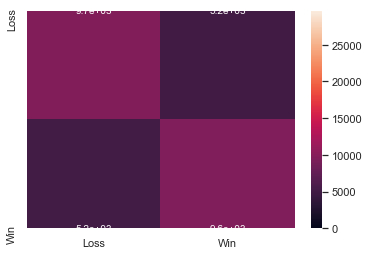

INFO:util.model_util:Saving model file: ../models/decisiontreeclassifier-1998-2018-baseline.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv
/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Saving report: ../reports/summary.csv


Running RandomForestClassifier


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


Model Score: 0.6491222147197839

ROC/AUC Score: 0.6491221177364463
              precision    recall  f1-score   support

        Loss       0.65      0.65      0.65     14815
         Win       0.65      0.65      0.65     14805

    accuracy                           0.65     29620
   macro avg       0.65      0.65      0.65     29620
weighted avg       0.65      0.65      0.65     29620

      Loss   Win
Loss  9621  5194
Win   5199  9606


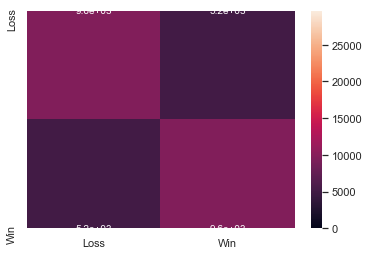

INFO:util.model_util:Saving model file: ../models/randomforestclassifier-1998-2018-baseline.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


Running GradientBoostingClassifier
      Iter       Train Loss   Remaining Time 
         1           1.3654            1.37s
         2           1.3484            1.41s
         3           1.3345            1.41s
         4           1.3231            1.36s
         5           1.3138            1.35s
         6           1.3061            1.33s
         7           1.2998            1.30s
         8           1.2946            1.27s
         9           1.2904            1.25s
        10           1.2869            1.24s
        20           1.2728            1.14s
        30           1.2707            0.99s
Model Score: 0.6519918973666442

ROC/AUC Score: 0.651991743720225
              precision    recall  f1-score   support

        Loss       0.65      0.65      0.65     14815
         Win       0.65      0.65      0.65     14805

    accuracy                           0.65     29620
   macro avg       0.65      0.65      0.65     29620
w

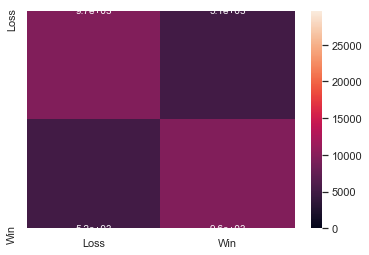

INFO:util.model_util:Saving model file: ../models/gradientboostingclassifier-1998-2018-baseline.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


Running AdaBoostClassifier
Model Score: 0.6519918973666442

ROC/AUC Score: 0.651991743720225
              precision    recall  f1-score   support

        Loss       0.65      0.65      0.65     14815
         Win       0.65      0.65      0.65     14805

    accuracy                           0.65     29620
   macro avg       0.65      0.65      0.65     29620
weighted avg       0.65      0.65      0.65     29620

      Loss   Win
Loss  9666  5149
Win   5159  9646


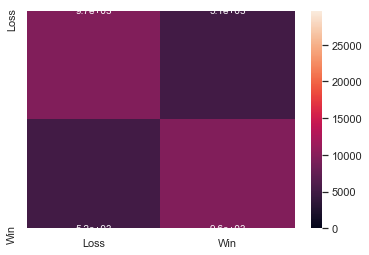

INFO:util.model_util:Saving model file: ../models/adaboostclassifier-1998-2018-baseline.pkl
INFO:util.model_util:Reading report: ../reports/summary.csv


Saving report: ../reports/summary.csv


In [4]:
for model in models:
    print(f'\n\nRunning {type(model).__name__}')
    mw = mu.ModelWrapper(model,
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                    column_filters = column_filters)
    mw.fit(X_train, y_train)
    predict = mw.predict(X_test)
    mw.analyze(y_test)
    plt.show()
    mw.save()

# Summary

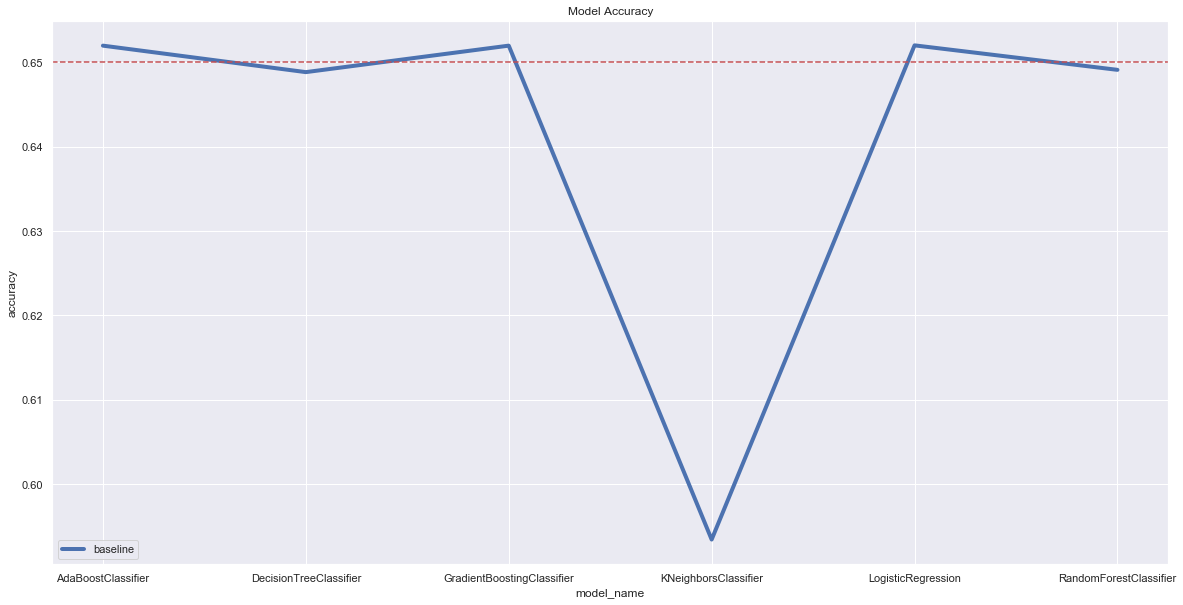

In [5]:
report = pd.read_csv(ModelWrapper.REPORT_FILE)

f, a = plt.subplots(1, 1, figsize=(20, 10))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    if desc == DESCRIPTION:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=4)
    else:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=0.75)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")
_ = a.legend(loc="lower left")

In [6]:
print(f'Last Finished: {datetime.now().strftime(DATE_FORMAT)}')

Last Finished: 2019-10-29 21:10
